# **Importing Common libraries**




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df= pd.read_csv("/content/drive/MyDrive/airline_clnd.csv")

Mounted at /content/drive


In [2]:
df

,SR,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


# **Data Cleaning**

In [3]:
df.isnull().sum()

,0
SR,0
id,0
Gender,0
Customer_Type,0
Age,0
Type_of_Travel,0
Class,0
Flight_Distance,0
Inflight_wifi_service,0
Departure/Arrival_time_convenient,0


In [4]:
df = df.dropna(subset=['Arrival_Delay_in_Minutes'])

In [5]:
df.drop(columns=['SR','id'],inplace=True,errors='ignore')

<ipython-input-5-8b922cdf5807>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['SR','id'],inplace=True,errors='ignore')


In [6]:
df.reset_index(drop=True,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer_Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type_of_Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight_Distance                    103594 non-null  int64  
 6   Inflight_wifi_service              103594 non-null  int64  
 7   Departure/Arrival_time_convenient  103594 non-null  int64  
 8   Ease_of_Online_booking             103594 non-null  int64  
 9   Gate_location                      103594 non-null  int64  
 10  Food_and_drink                     103594 non-null  int64  
 11  Online_boarding                    1035

In [8]:
df.describe()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


# **Data Analysis and visualization**

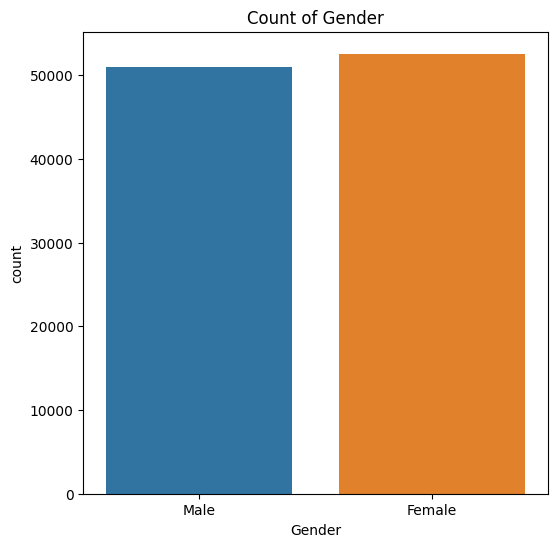

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='Gender',hue= 'Gender')
plt.title('Count of Gender')
plt.show()

The count of Female travelers slightly higher than male travelers

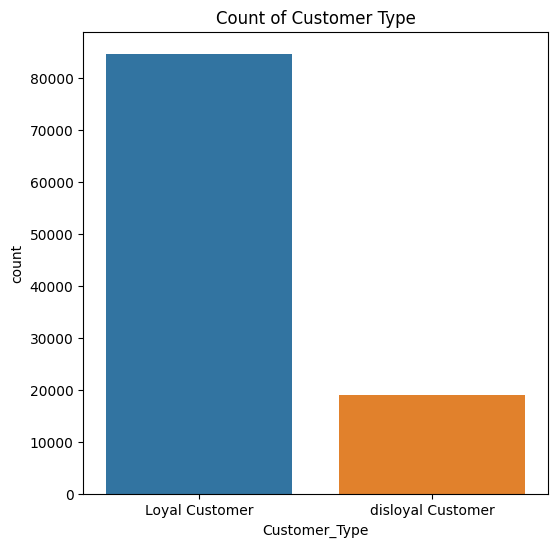

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='Customer_Type',hue= 'Customer_Type')
plt.title('Count of Customer Type')
plt.show()

Major travelers were their Loyal customers.

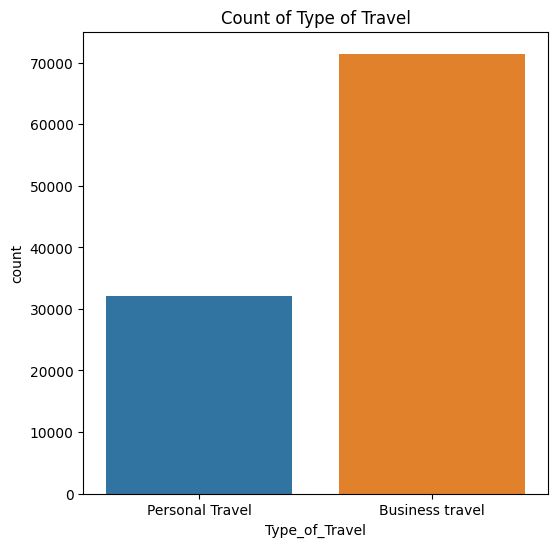

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='Type_of_Travel',hue= 'Type_of_Travel')
plt.title('Count of Type of Travel')
plt.show()

from the above visualization, we saw that major travel types of customers were business travel.

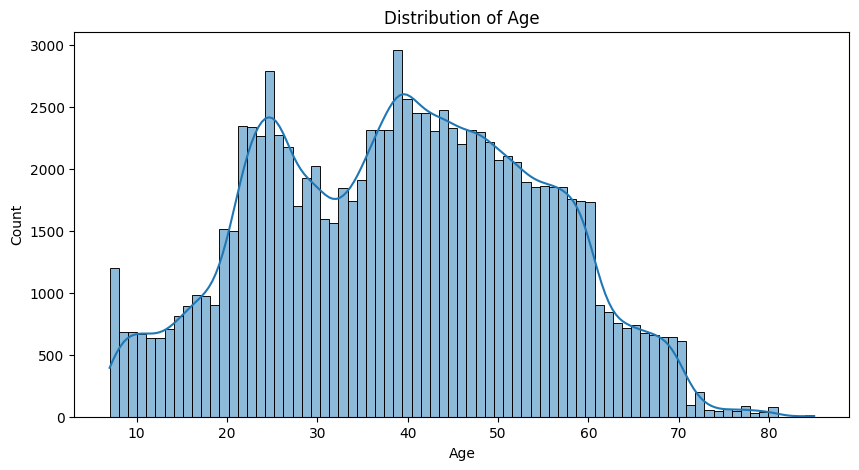

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'],kde = True)
plt.title('Distribution of Age')
plt.show()

From the above visualization, we have an insight that major customers age were between 20 to 60.

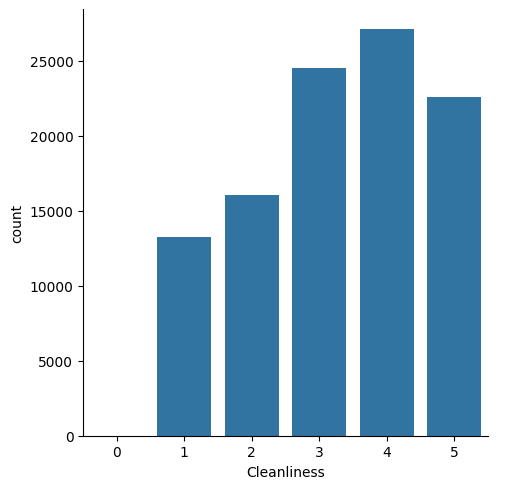

In [14]:
sns.catplot(data=df,x='Cleanliness', kind='count')

Many peoples were satisfied with the cleanliness (count of rating '0' is very less).

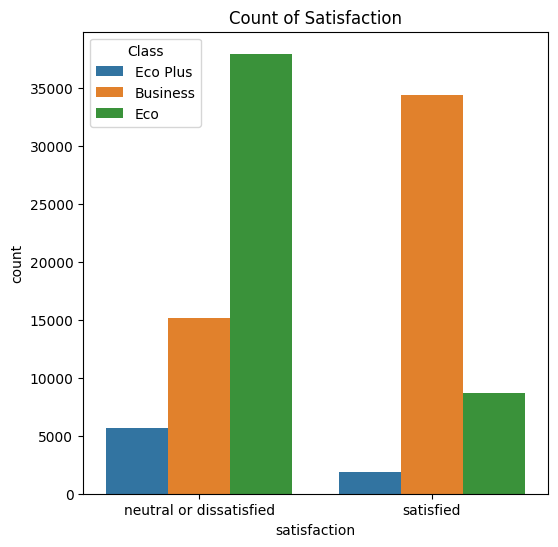

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='satisfaction',hue='Class')
plt.title('Count of Satisfaction')
plt.show()

- From the visulization we understood that many of the Customers who Traveled in Eco Class were not satisfied.
- Also customers who used Business class were majorly satisfied..

In [16]:
df['satisfaction'].value_counts()

,count
satisfaction,
neutral or dissatisfied,58697
satisfied,44897


## **Encoding the categorical features**

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
encoded_satisfaction = le.fit_transform(df['satisfaction'])
encoded_satisfaction_df = pd.DataFrame(encoded_satisfaction,columns =['satisfaction'])
encoded_satisfaction_df

,satisfaction
0,0
1,0
2,1
3,0
4,1
...,...
103589,0
103590,1
103591,0
103592,0


In [19]:
encoded_Gender = le.fit_transform(df[['Gender']])
encoded_Gender_df = pd.DataFrame(encoded_Gender,columns =['Gender'])
encoded_Gender_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Gender
0,1
1,1
2,0
3,0
4,1


In [20]:
encoded_customer_type = le.fit_transform(df[['Customer_Type']])
encoded_customer_type_df = pd.DataFrame(encoded_customer_type,columns =['Customer_Type'])
encoded_customer_type_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Customer_Type
0,0
1,1
2,0
3,0
4,0


In [21]:
encoded_type_of_travel = le.fit_transform(df[['Type_of_Travel']])
encoded_type_of_travel_df = pd.DataFrame(encoded_type_of_travel,columns =['Type_of_Travel'])
encoded_type_of_travel_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Type_of_Travel
0,1
1,0
2,0
3,0
4,0


In [22]:
encoded_Class = le.fit_transform(df[['Class']])
encoded_Class_df = pd.DataFrame(encoded_Class,columns =['Class'])
encoded_Class_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Class
0,2
1,0
2,0
3,0
4,0


In [23]:
cleaned_df = df.drop(columns=['satisfaction','Gender','Customer_Type','Type_of_Travel','Class'])
cleaned_df.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [24]:
merged_df = pd.concat([cleaned_df,encoded_Gender_df,encoded_customer_type_df,encoded_type_of_travel_df,encoded_Class_df,encoded_satisfaction_df],axis=1)
merged_df.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender,Customer_Type,Type_of_Travel,Class,satisfaction
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,1,0,1,2,0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,0,0,1


In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103594 non-null  int64  
 1   Flight_Distance                    103594 non-null  int64  
 2   Inflight_wifi_service              103594 non-null  int64  
 3   Departure/Arrival_time_convenient  103594 non-null  int64  
 4   Ease_of_Online_booking             103594 non-null  int64  
 5   Gate_location                      103594 non-null  int64  
 6   Food_and_drink                     103594 non-null  int64  
 7   Online_boarding                    103594 non-null  int64  
 8   Seat_comfort                       103594 non-null  int64  
 9   Inflight_entertainment             103594 non-null  int64  
 10  On-board_service                   103594 non-null  int64  
 11  Leg_room_service                   1035

# **Finding the correlation between features and target**

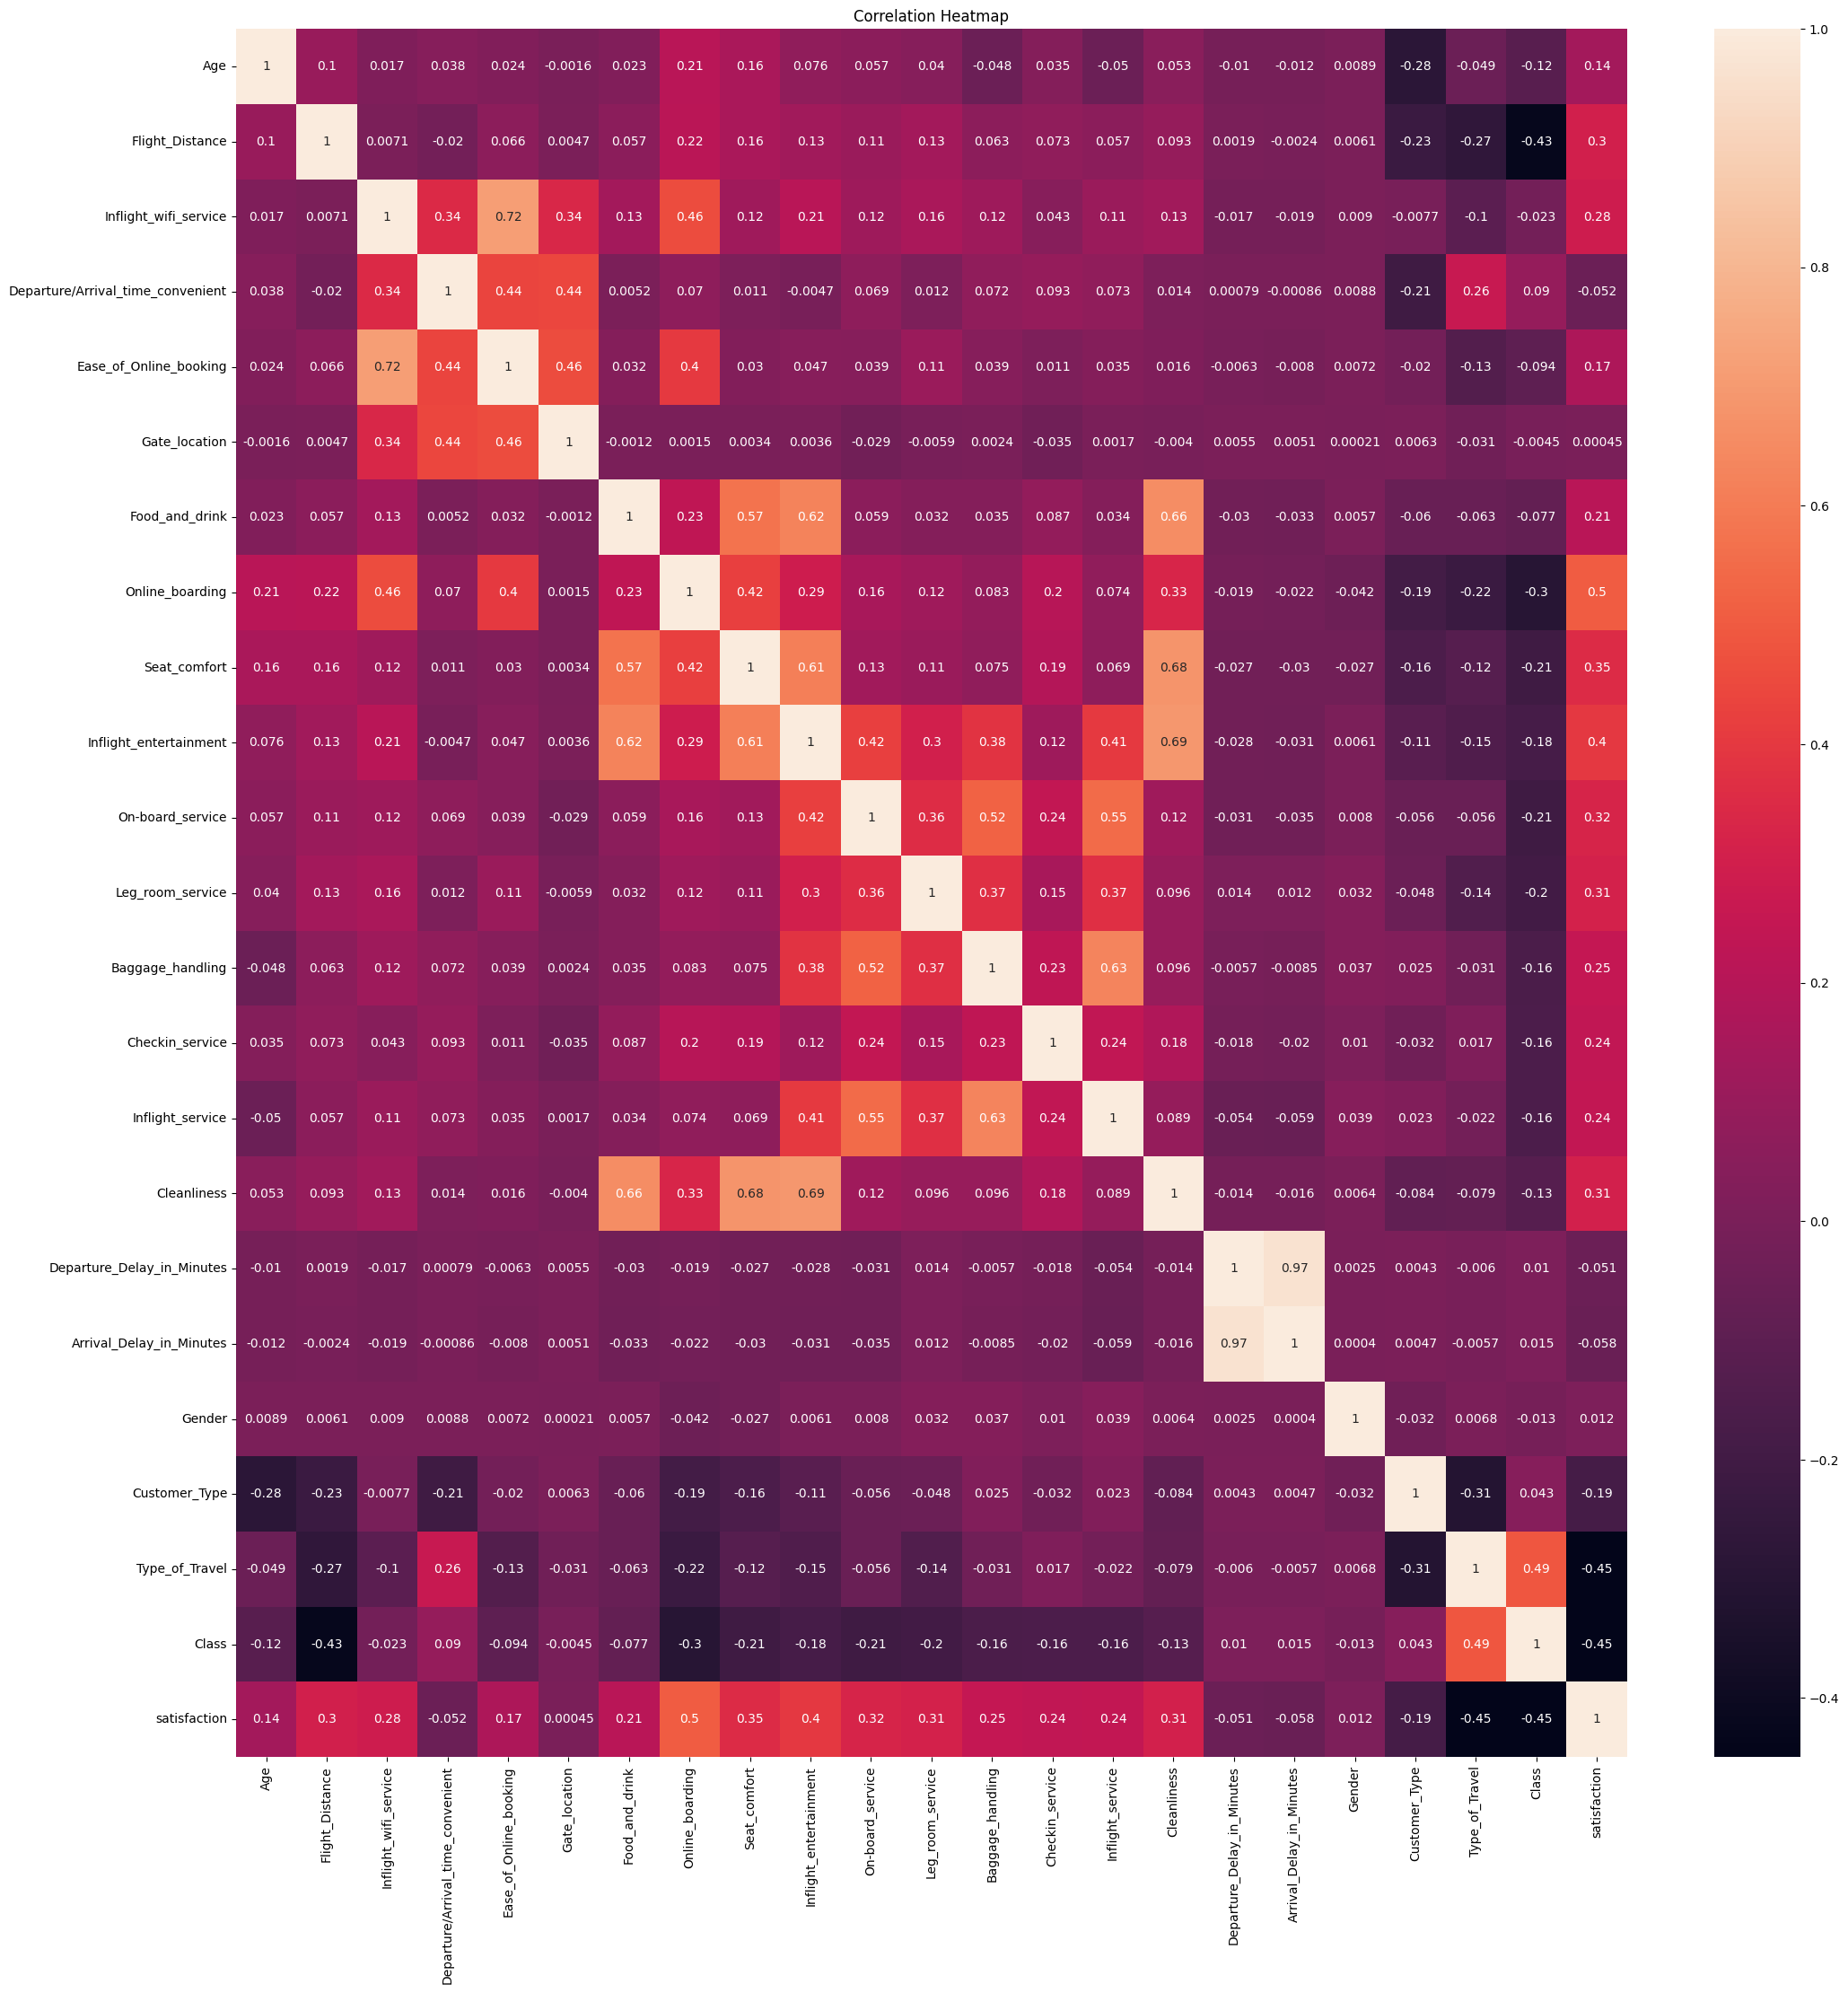

In [26]:
merged_df_corr = merged_df.corr()
plt.figure(figsize = (25,25))
sns.heatmap(merged_df_corr, annot = True)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
merged_df_corr['satisfaction'].sort_values(ascending=False)

,satisfaction
satisfaction,1.000000
Online_boarding,0.503447
Inflight_entertainment,0.398203
Seat_comfort,0.349112
On-board_service,0.322450
Leg_room_service,0.313182
Cleanliness,0.305050
Flight_Distance,0.298915
Inflight_wifi_service,0.284163
Baggage_handling,0.247819


# **Splitting the data into features (X) and Target (y)**

In [28]:
X = merged_df.drop(columns=['satisfaction'])
y = merged_df['satisfaction']

In [29]:
X.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender,Customer_Type,Type_of_Travel,Class
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,1,0,1,2
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,1,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,0,0


In [30]:
y.head()

,satisfaction
0,0
1,0
2,1
3,0
4,1


# **Applying Machine learning process to predict the Customer Satisfaction**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [33]:
rfc = RandomForestClassifier()

In [34]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = rfc.predict(X_test)

In [36]:
y_train_pred = rfc.predict(X_train)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     23461
           1       0.97      0.94      0.95     17977

    accuracy                           0.96     41438
   macro avg       0.96      0.96      0.96     41438
weighted avg       0.96      0.96      0.96     41438



The values of Accuracy, Precision, Recall are good and ready to do prediction